In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [111]:
train_users = pd.read_csv('airbnb-recruiting-new-user-bookings/train_users.csv')
test_users = pd.read_csv('airbnb-recruiting-new-user-bookings/test_users.csv')

In [112]:
print(train_users.shape)
train_users.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [113]:
print(test_users.shape)
test_users.head()

(62096, 15)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


# Missing Data

In [114]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [115]:
train_users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

- 약 21만명의 가입자 중 58%인 12만명 정도가 가입만 하고 예약을 하지 않은 회원이다.
(전체 213451명, 첫 예약을 진행한 회원 124543명)
- 약 8만 8천명 정도의 나이에 null 값이 있다.
- first_affiliate_tracked(가입 전 사용자가 겪은 마케팅)에 6000개 정도 null 값이 존재한다. 

## 나이(age)

In [116]:
train_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

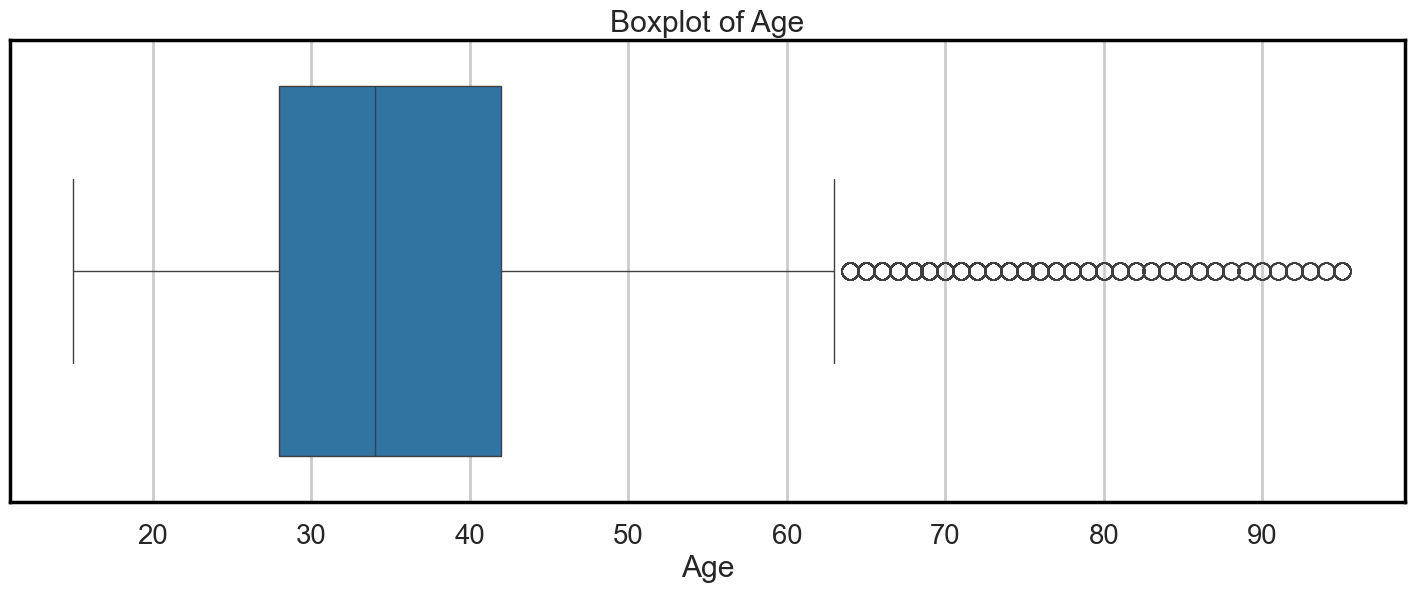

In [144]:
plt.figure(figsize=(18, 6))
sns.boxplot(x=train_users['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

이 데이터셋의 모든 사용자는 미국 출신이다. 
- Airbnb 이용 약관에 따르면 미국 18세 미만 사용자는 에어비앤비 계정을 만들거나 예약할 수 없다.(https://www.airbnb.co.kr/help/article/3047)
  따라서 18세 미만은 null 값으로 변경한다. 
- 기네스북 기준 세계 최고령은 122살이다. 동일하게 122살 이하는 null 값으로 변경한다.
  (https://www.hani.co.kr/arti/science/future/1090503.html)

In [118]:
print(sum(train_users.age > 122))
print(sum(train_users.age < 18))
# 122살 미만인 사람은 총 781명, 18세 미만인 사람은 총 158명이다. 

781
158


In [119]:
train_users.loc[train_users.age > 95, 'age'] = np.nan
train_users.loc[train_users.age < 13, 'age'] = np.nan

In [120]:
train_users.age.isnull().sum()

90485

age 컬럼의 null 값이 87990에서 90485으로 바뀌었다. 

## 성별(gender)

In [121]:
train_users['gender'].value_counts()

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: count, dtype: int64

일반적인 null 값과 달리 gender 컬럼에 알 수 없는 값을 '-unknown-'으로 표시하였다. 
이를 null 값으로 바꾸어준다. 

In [122]:
train_users['gender'] = train_users['gender'].replace('-unknown-', np.nan)

In [138]:
train_users['gender'].value_counts()

gender
FEMALE    63041
MALE      54440
OTHER       282
Name: count, dtype: int64

## 첫 번째 브라우저(first_browser)

In [202]:
train_users['first_browser'].value_counts()

first_browser
Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                   

# Data Types

object 타입의 데이터를 category 타입으로 변경
- object : 문자열 데이터. 많은 메모리 사용. 연산이 느림
- category : 범주형 데이터. object에 비해 적은 메모리 사용. 연산 빠름

In [124]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    train_users[categorical_feature] = train_users[categorical_feature].astype('category')

날짜 데이터는 datetime 형식으로 변환

In [125]:
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])

# timestamp_first_active(20090319043255)을 새로운 형식으로 변환(2009-03-19)하여 date_first_active 컬럼 생성
train_users['date_first_active'] = pd.to_datetime((train_users.timestamp_first_active // 1000000), format='%Y%m%d')

In [126]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  int64         
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   117763 non-null  category      
 5   age                      122966 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

In [127]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


# Visualizing

## 성별(gender)

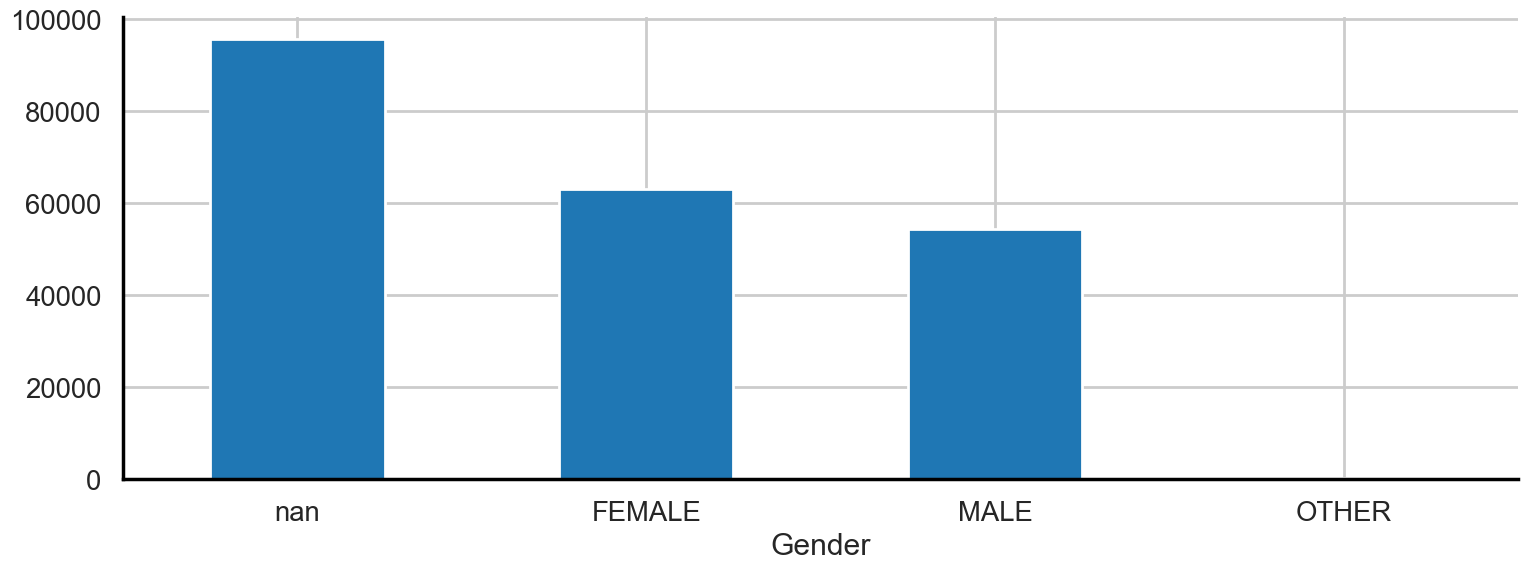

In [140]:
plt.figure(figsize=(18, 6))

train_users['gender'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Gender')
sns.despine()

성별 컬럼에는 누락값이 꽤 많은 것을 볼 수 있으며, 성별의 차이도 있는 것을 볼 수 있다. 

## 나이(age)

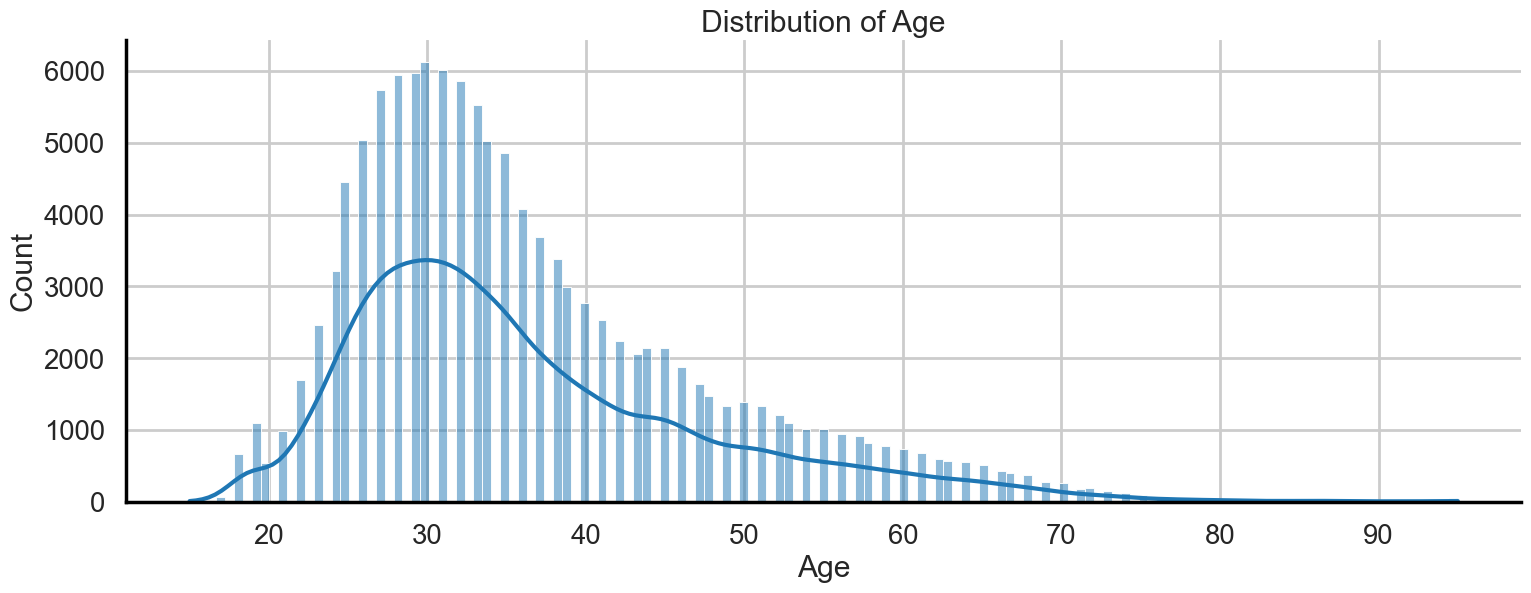

In [139]:
plt.figure(figsize=(18, 6))
sns.histplot(train_users['age'].dropna(), kde=True)
plt.xlabel('Age')
plt.title('Distribution of Age')
sns.despine()
plt.show()

대부분 나이는 25세 정도에서 40세 정도 사이로 나타난다. 

## 가입방법(signup_method)

<Axes: xlabel='signup_method'>

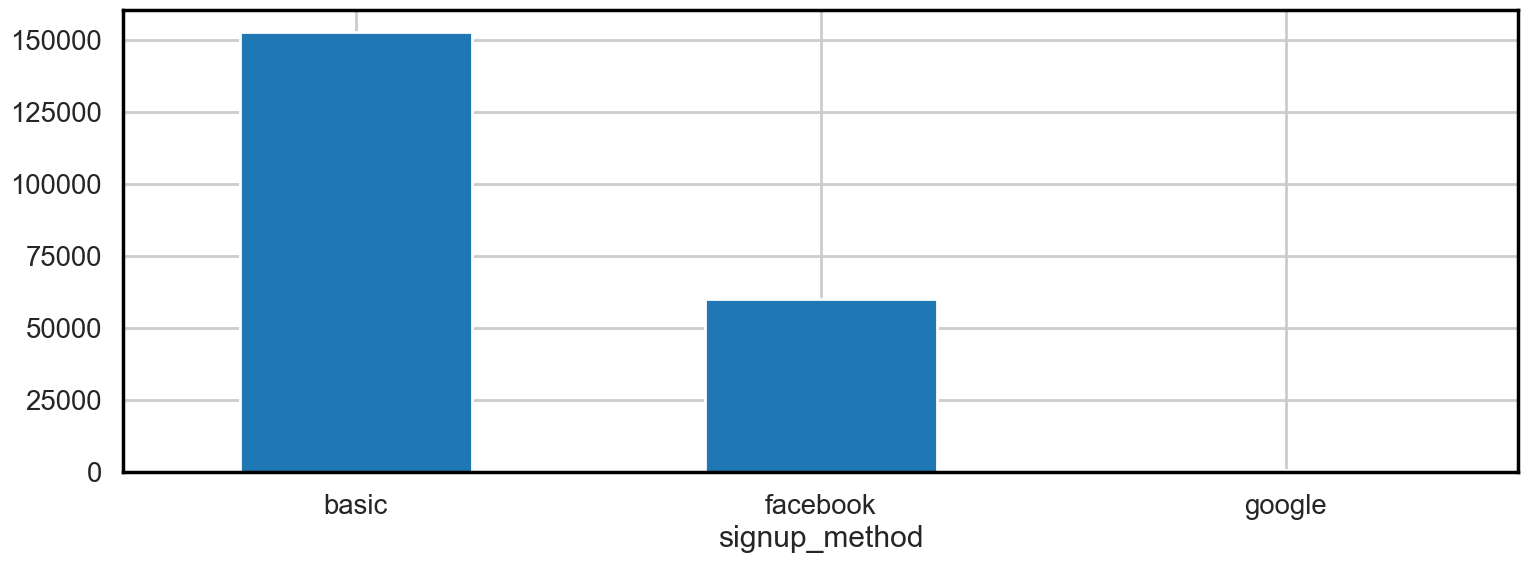

In [147]:
plt.figure(figsize=(18, 6))
train_users['signup_method'].value_counts().plot(kind='bar', rot=0)

일반적으로 가입하는 방식(basic)이 많다. 

## 가입 애플리케이션(signup_app)

<Axes: xlabel='signup_app'>

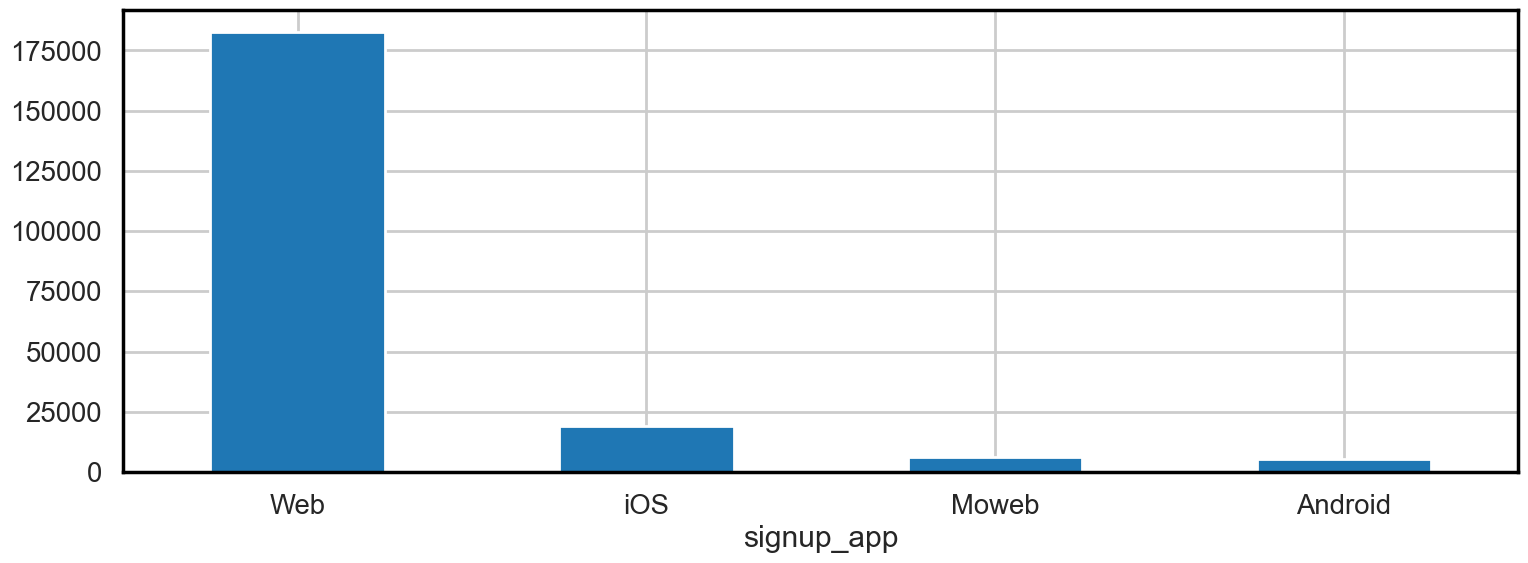

In [149]:
plt.figure(figsize=(18, 6))
train_users['signup_app'].value_counts().plot(kind='bar', rot=0)

## 최초 기기 유형(first_device_type)

<Axes: xlabel='first_device_type'>

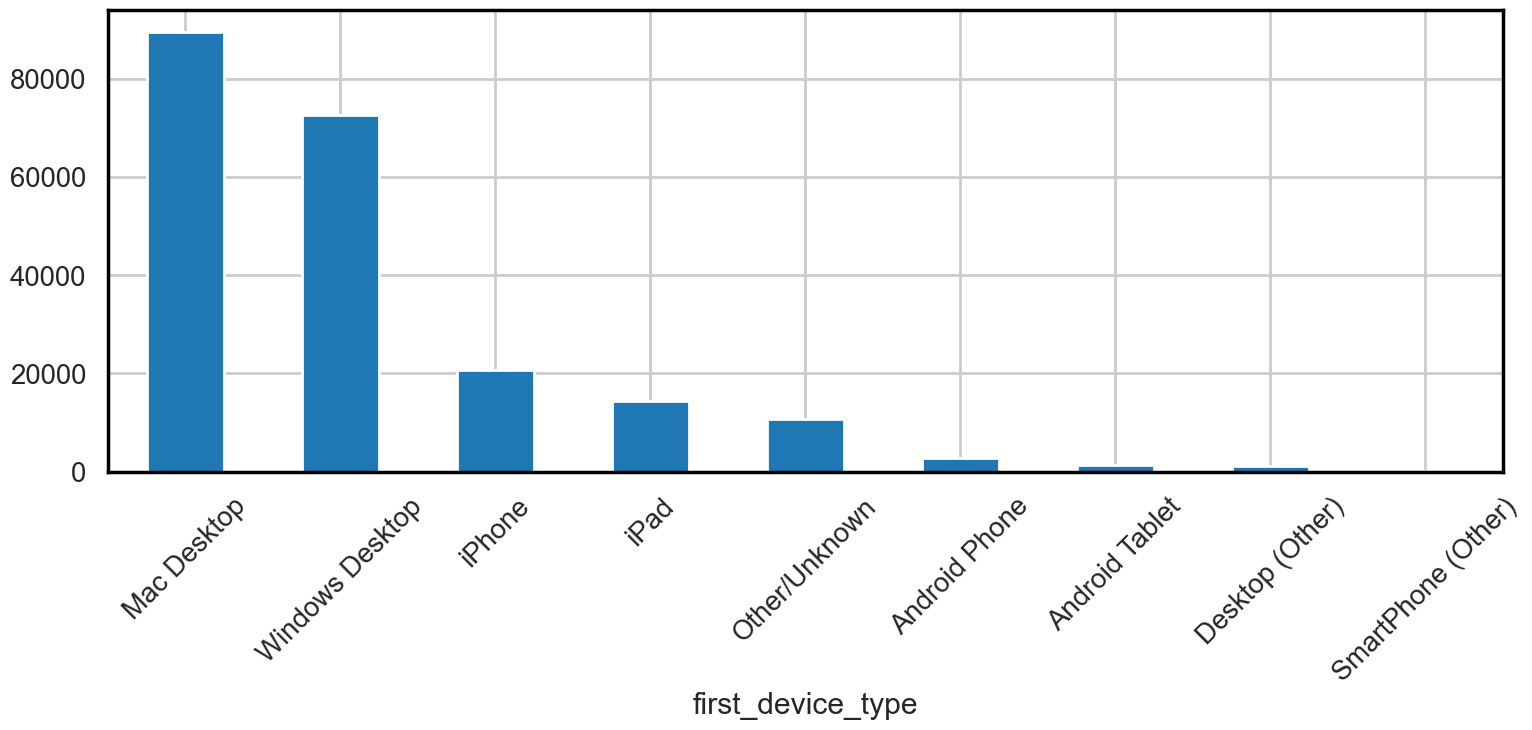

In [151]:
plt.figure(figsize=(18, 6))
train_users['first_device_type'].value_counts().plot(kind='bar', rot=45)

## 최초 브라우저(first_browser)

<Axes: xlabel='first_browser'>

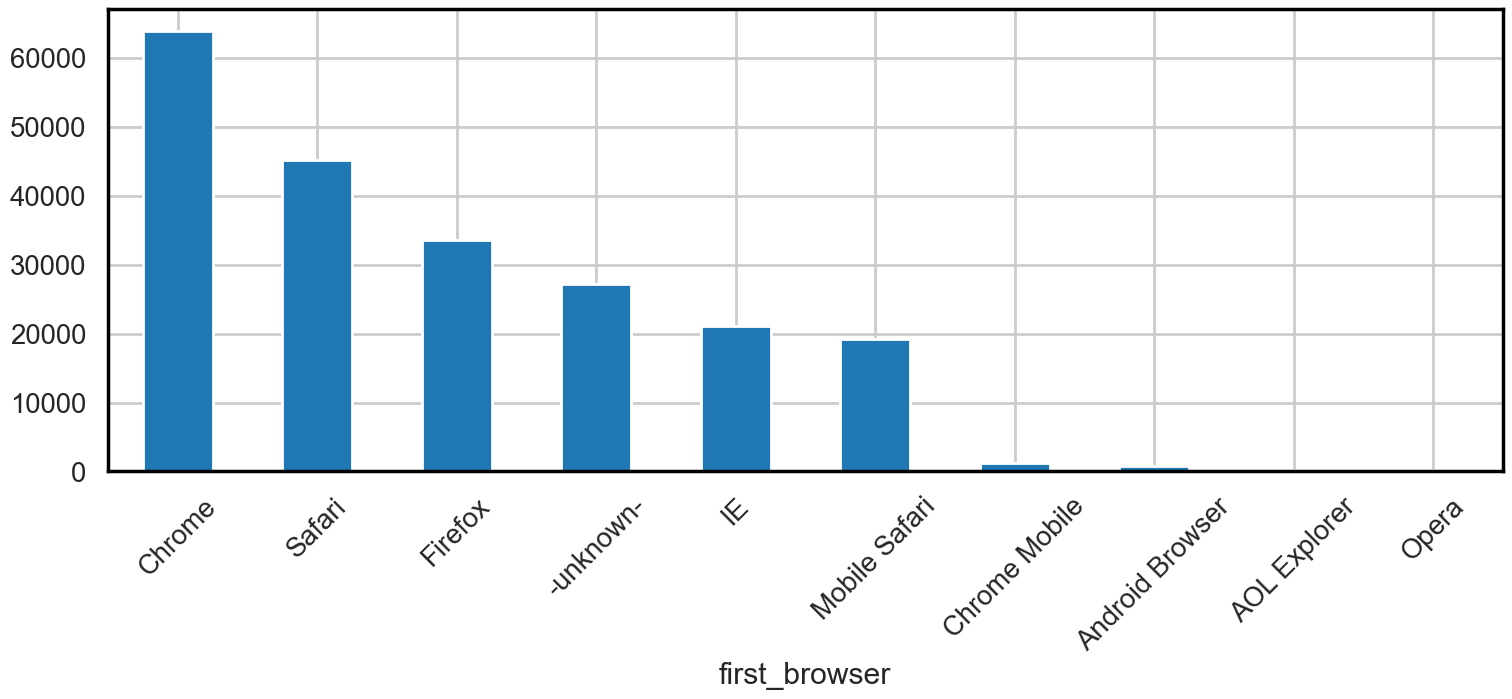

In [153]:
plt.figure(figsize=(18, 6))
train_users['first_browser'].value_counts().head(10).plot(kind='bar', rot=45)
# 값이 많기 때문에 상위 10개만 나타냄

## 예약 목적지(country_destination)

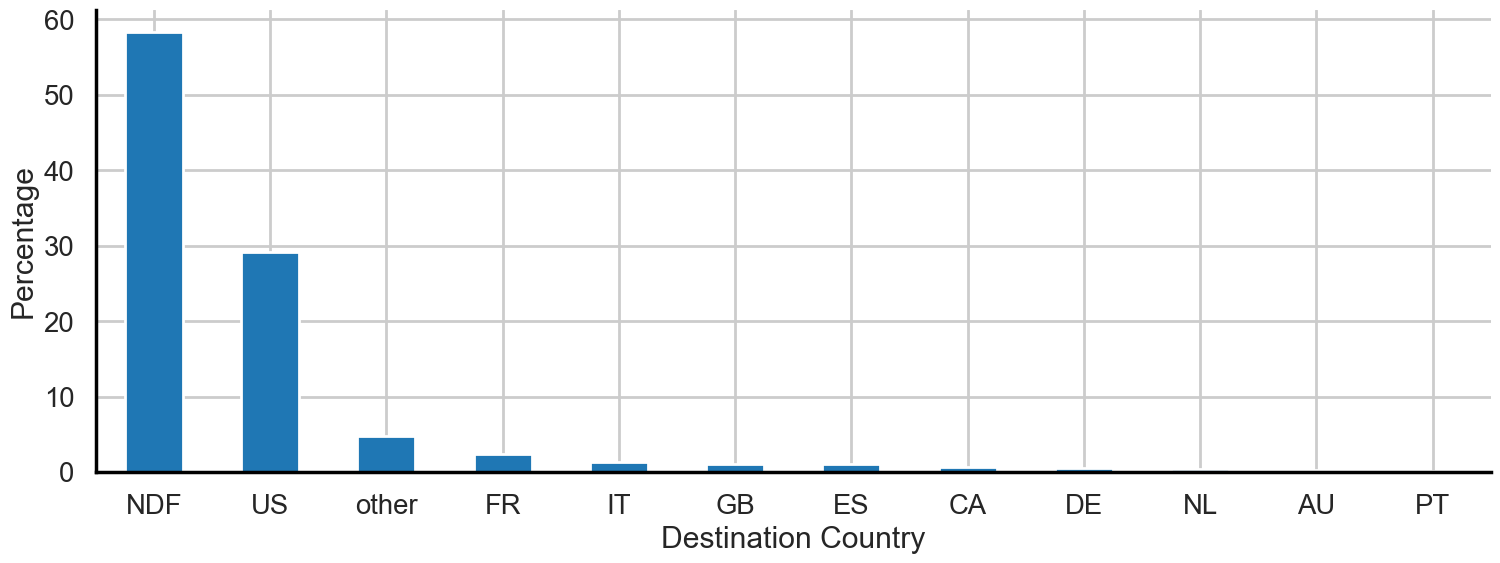

In [142]:
plt.figure(figsize=(18, 6))

destination_percentage = train_users['country_destination'].value_counts() / train_users.shape[0] * 100
destination_percentage.plot(kind='bar', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

이 사용자들은 모두 미국 출신이다. 또한, 대부분의 예약 목적지는 미국으로 나타나지만(약 30%) 
대부분이 가입을 하고 예약을 하지 않은 것을 볼 수 있다. (58%)
(NDF : No Destination Found)

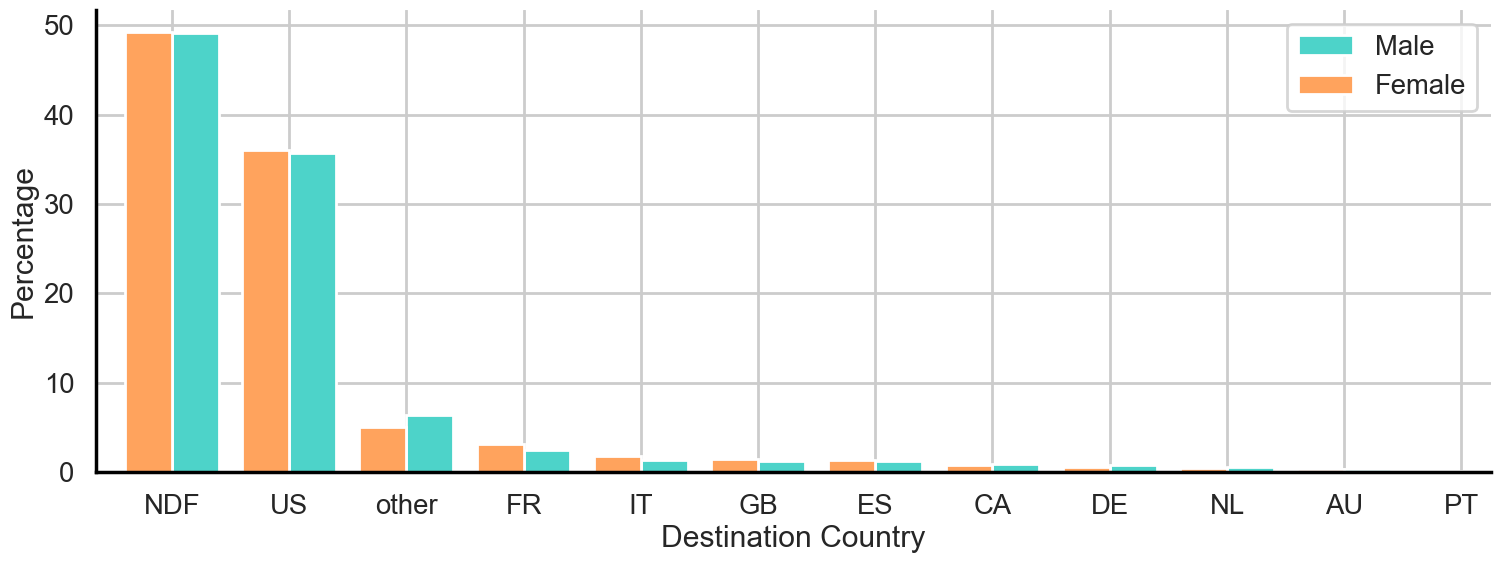

In [143]:
plt.figure(figsize=(18, 6))

# 성별에 따른 예약 목적지를 확인해보자
women = sum(train_users['gender'] == 'FEMALE')
men = sum(train_users['gender'] == 'MALE')

female_destinations = train_users.loc[train_users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = train_users.loc[train_users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

상위 2개 예약 목적지(예약 없음, 미국)에 대하여 성별간 차이가 크게 나타나지 않는다. 

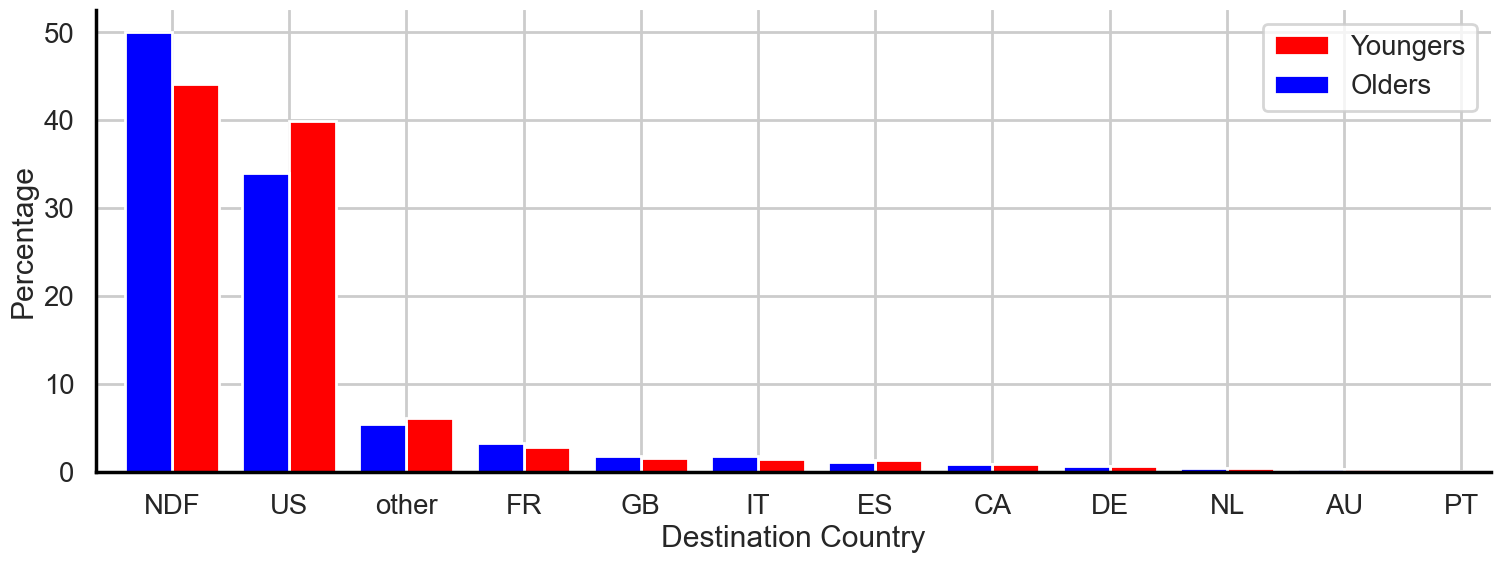

In [141]:
# 45세 정도를 기준으로 젊은층과 노년층으로 나이를 분류하여 예약 목적지를 확인해보자. 
plt.figure(figsize=(18, 6))

age = 45

younger = sum(train_users.loc[train_users['age'] < age, 'country_destination'].value_counts())
older = sum(train_users.loc[train_users['age'] > age, 'country_destination'].value_counts())

younger_destinations = train_users.loc[train_users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = train_users.loc[train_users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color = 'red', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color = 'blue',position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

젊은층은 미국을 선호하는 경향이 많으며, 노년층은 해외여행을 가는 경향이 있는 것을 볼 수 있다.
(큰 차이는 없다.)

## 계정 생성 날짜(date_account_created)

<Axes: xlabel='date_account_created'>

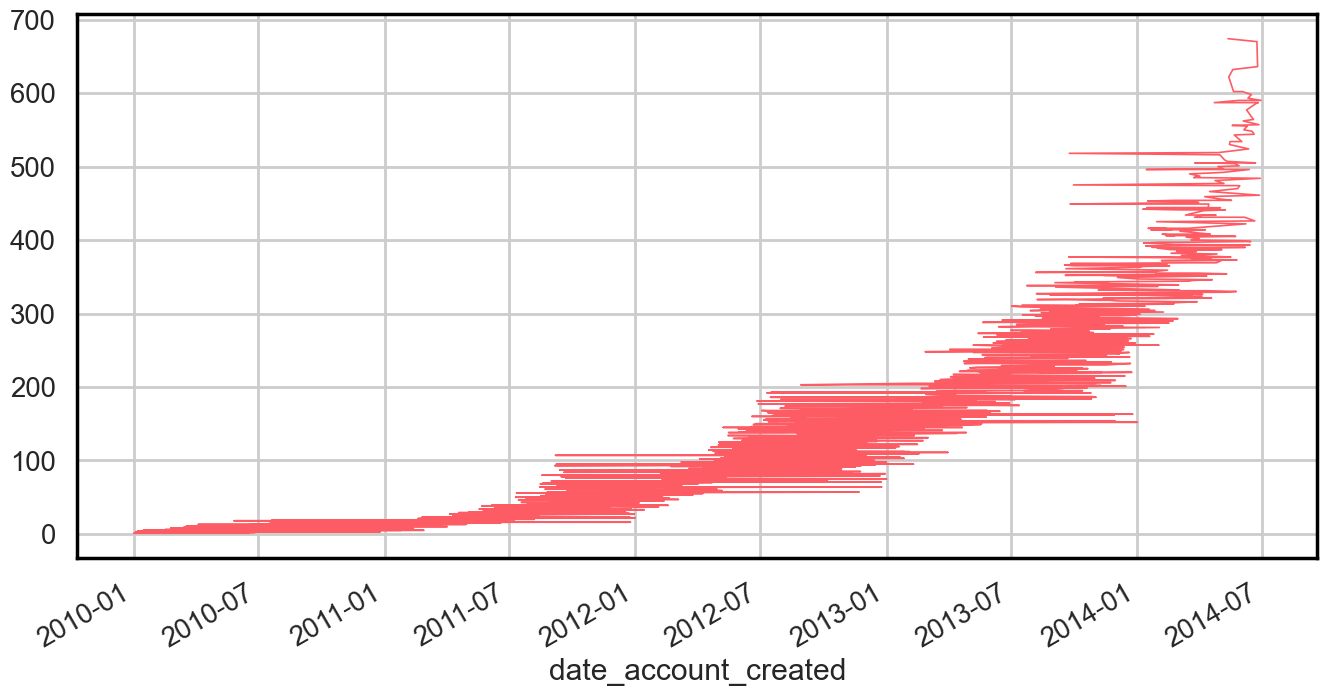

In [133]:
# 계정 생성 날짜에 따라 생성된 계정 수 확인
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=0.9)
train_users['date_account_created'].value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

2011년 7월부터 약 3년간 airbnb가 크게 성장했음을 알 수 있다. 

In [175]:
# 계정 생성 날짜를 년도에 따라 알아보자. (2010~2014)
train_users['acc_year'] = train_users['date_account_created'].dt.year


df1 = train_users.groupby('acc_year').count()
df1.head()

years = [2010,2011,2012,2013,2014]
yearsOrder=pd.api.types.CategoricalDtype(ordered=True, categories=years)
df1.reset_index(inplace = True)
df1.acc_year = df1.acc_year.astype(yearsOrder)

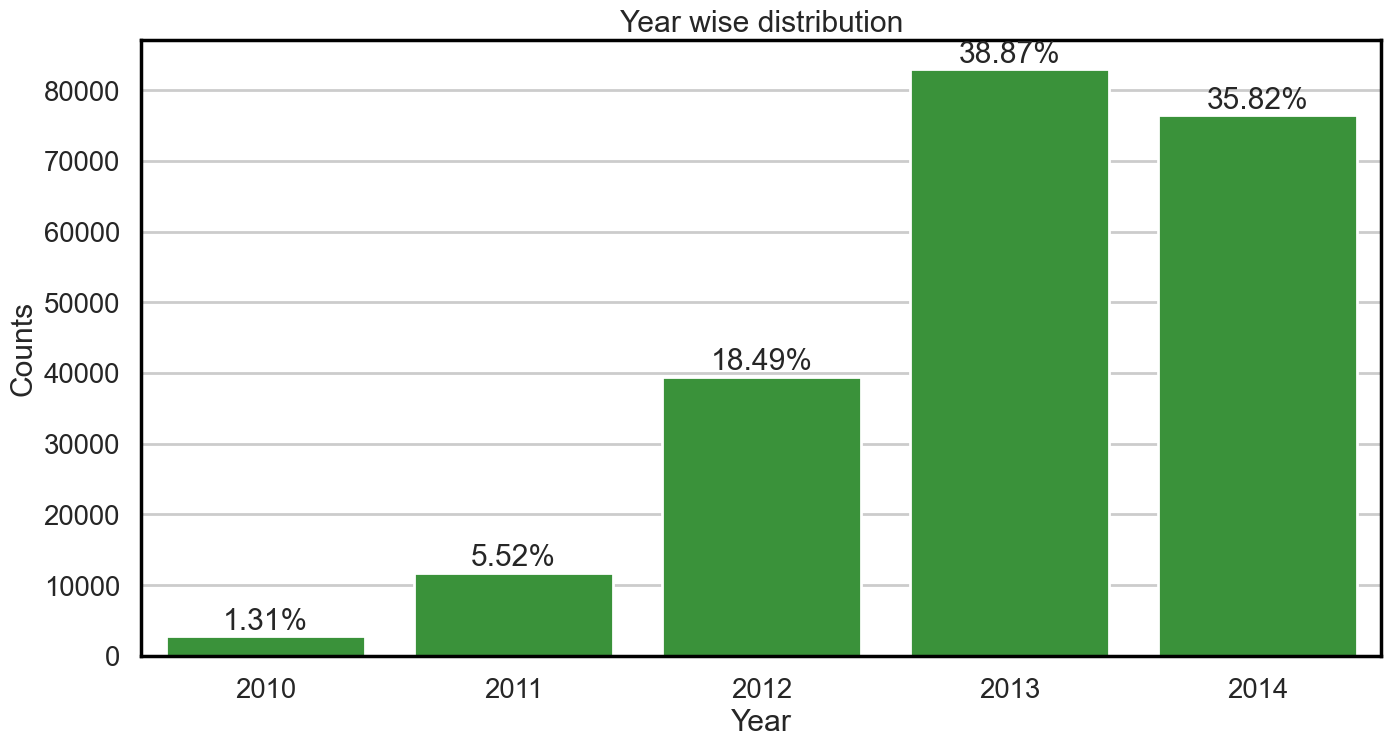

In [176]:
plt.figure(figsize=(16,8))
sns.barplot(data=df1,x='acc_year',y='affiliate_provider',color=sns.color_palette()[2]);
plt.title('Year wise distribution');
plt.xlabel('Year')
plt.ylabel('Counts')
for i in range(df1.shape[0]):
    count=df1.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/train_users.shape[0])
    plt.text(i,count+1000,strt,ha='center')

<Axes: xlabel='date_first_active'>

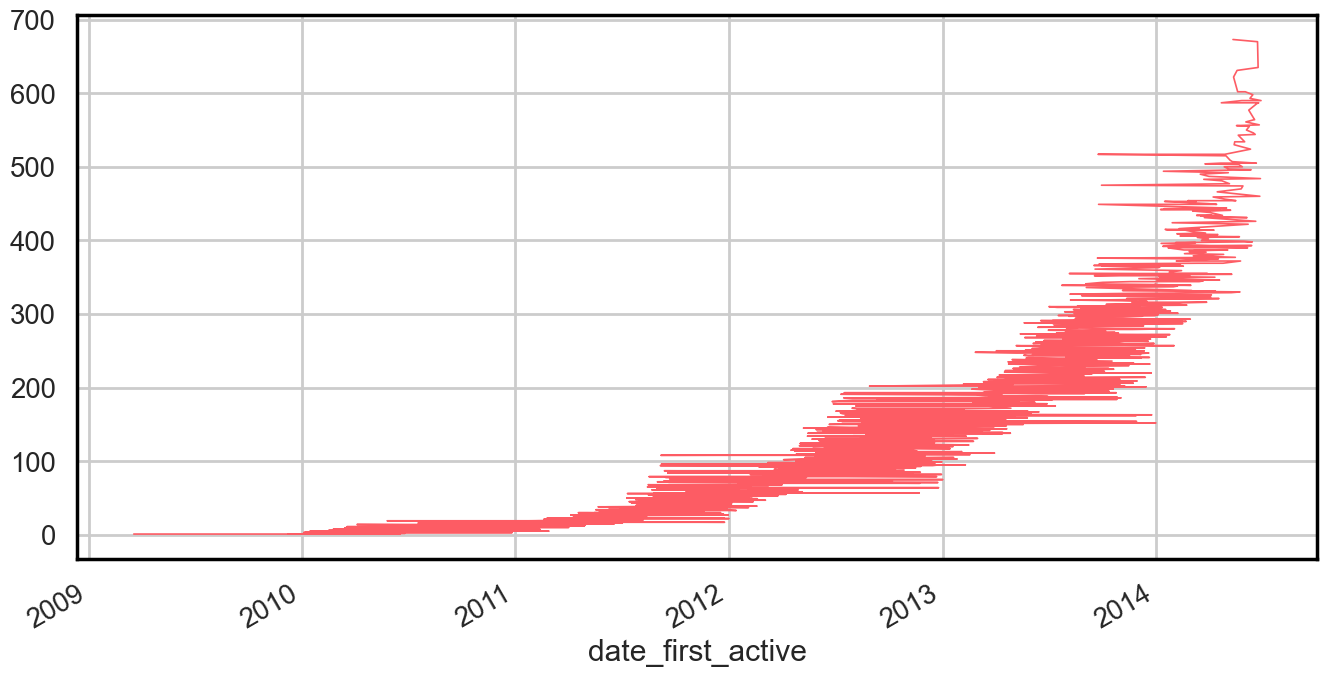

In [134]:
## 사용자의 첫 번째 활동 타임값.
plt.figure(figsize=(16, 8))
train_users['date_first_active'].value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

계정을 생성한 날짜와 처음 활동한 날짜가 매우 비슷한 경향을 보인다. 

요일에 따른 계정 생성 수 변화를 알아보자. 

In [135]:
# date.weekday() : 요일 정보를 숫자로 추출
# 0은 월요일, 1은 화요일, ..., 6은 일요일을 의미함. 

# 계정 생성 날짜의 요일을 추출하여 시리즈로 생성
weekdays = []
for date in train_users['date_account_created']:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

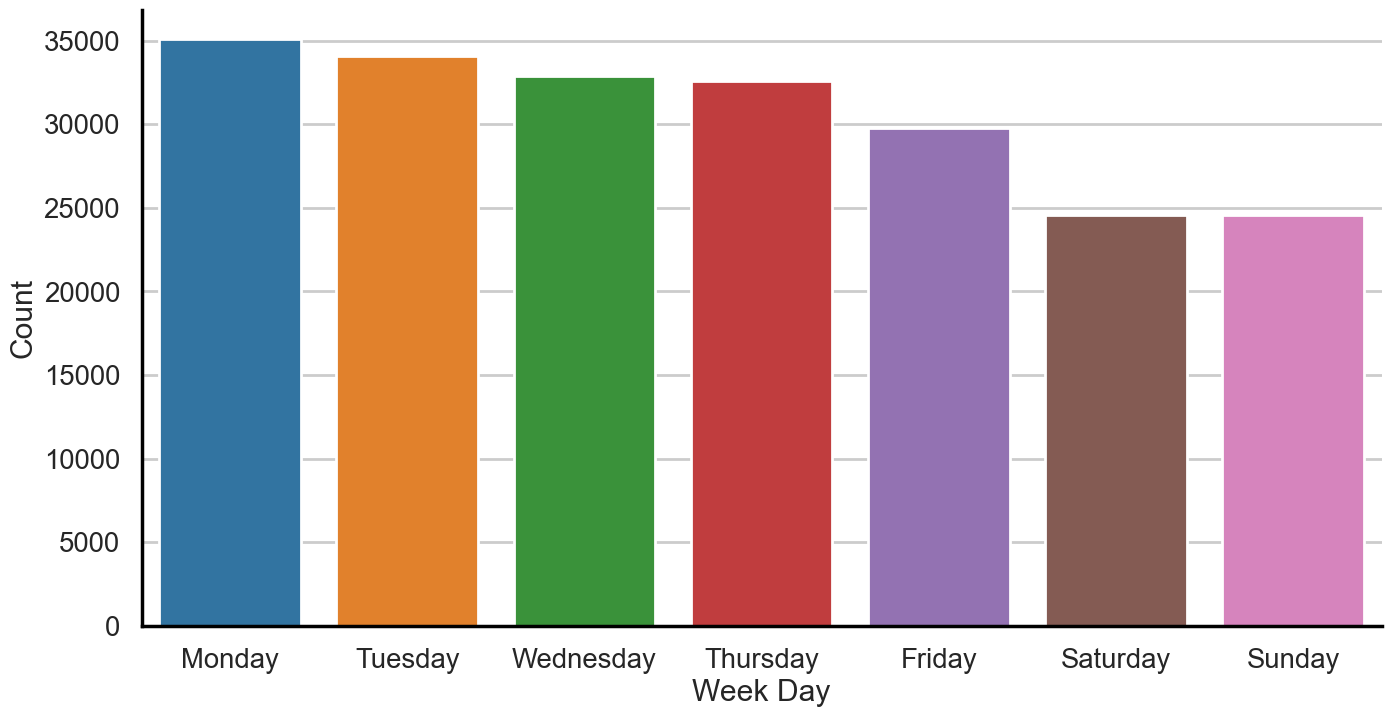

In [136]:
plt.figure(figsize=(16, 8))

# x축의 값을 월요일부터 일요일까지로 변경
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 바 플롯 그리기
sns.barplot(x=day_labels, y=weekdays.value_counts().values, hue=day_labels, dodge=False)
plt.xlabel('Week Day')
plt.ylabel('Count')
sns.despine()
plt.show()

평일에 계정 생성이 많이 일어나며, 주말에 계정 생성이 적게 일어나는 것을 볼 수 있다. 

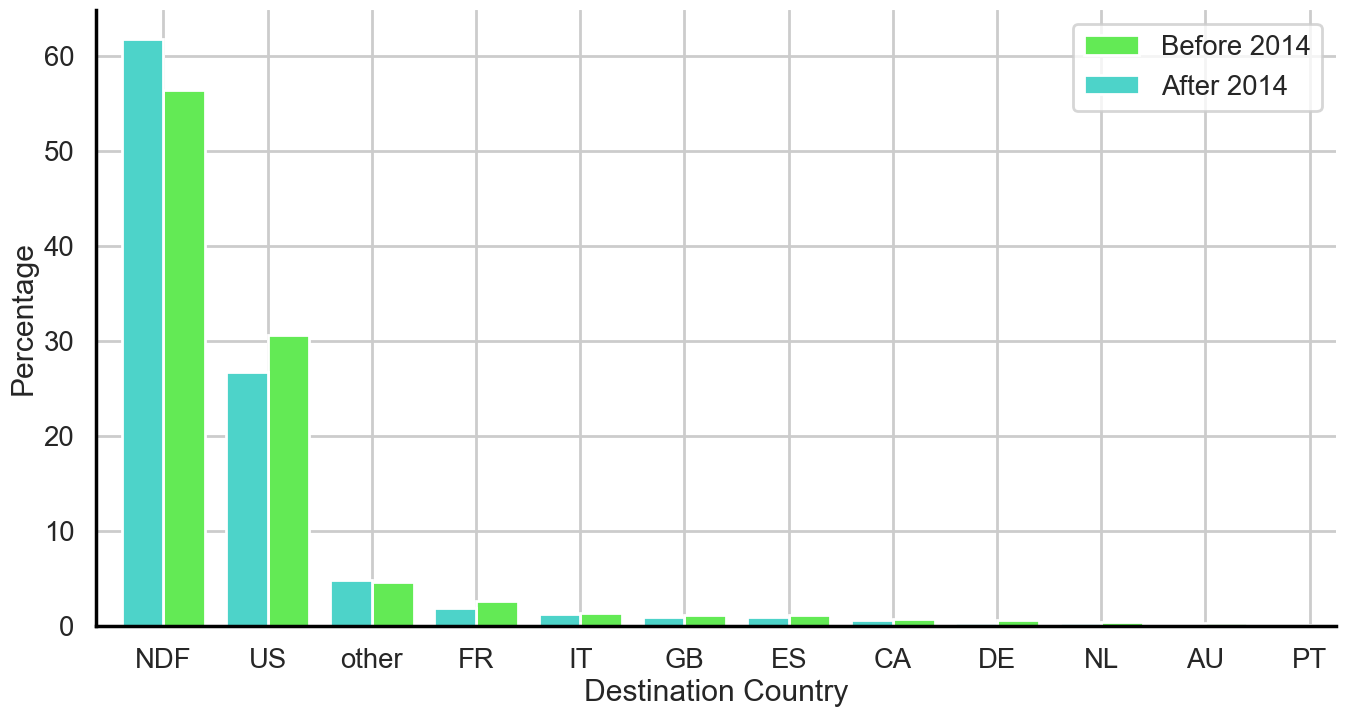

In [137]:
plt.figure(figsize=(16, 8))

date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(train_users.loc[train_users['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(train_users.loc[train_users['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = train_users.loc[train_users['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = train_users.loc[train_users['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100

before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

## 첫 예약(date_first_booking)

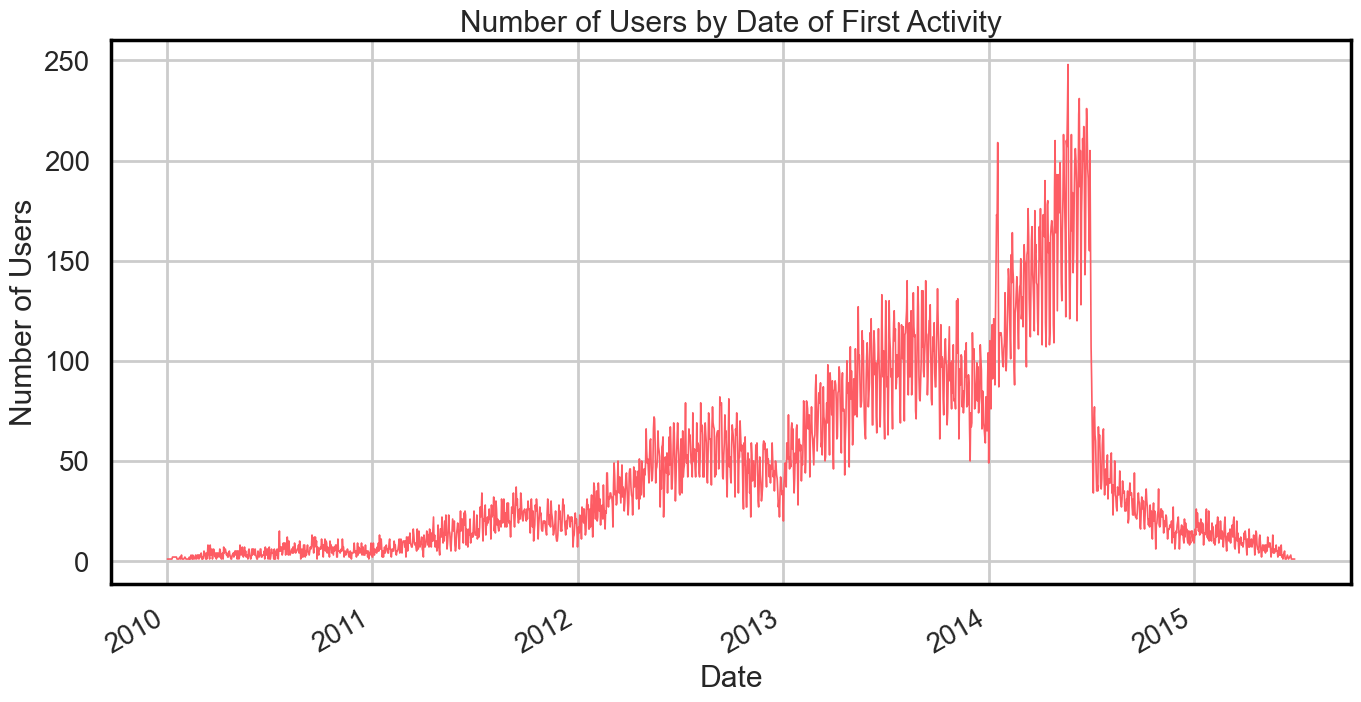

In [187]:
# 날짜에 따른 첫 예약 수 (각 날짜에 첫 예약이 몇 번 이루어졌는지)
plt.figure(figsize=(16, 8))
train_users['date_first_booking'].value_counts().sort_index().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Number of Users by Date of First Activity')
plt.show()


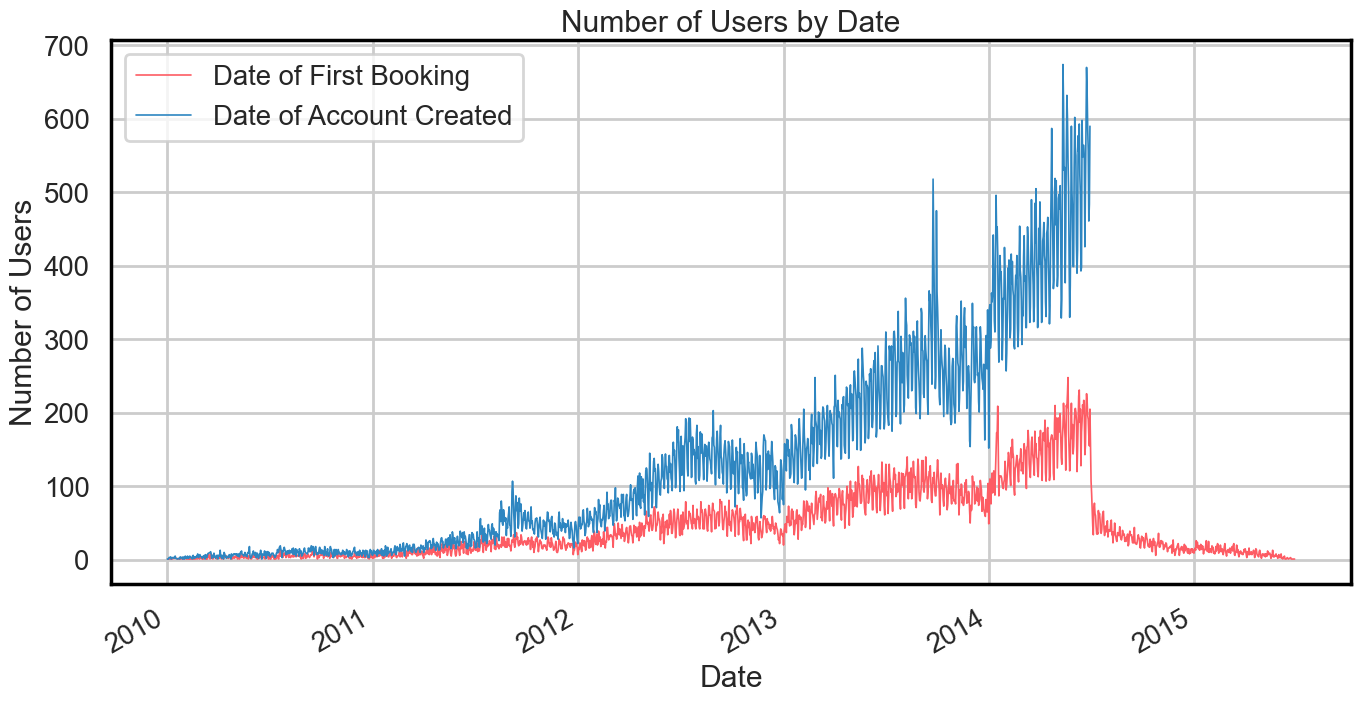

In [188]:
plt.figure(figsize=(16, 8))
train_users['date_first_booking'].value_counts().sort_index().plot(kind='line', linewidth=1.2, color='#FD5C64', label='Date of First Booking')
train_users['date_account_created'].value_counts().sort_index().plot(kind='line', linewidth=1.2, color='#2E86C1', label='Date of Account Created')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Number of Users by Date')
plt.legend()
plt.show()


계정 생성 날짜와 첫 예약 날짜 비교 <br>
파란색은 계정 생성을 의미하며, 빨간색은 첫 예약을 의미한다. 

## 첫 예약 날짜 - 가입 날짜

In [154]:
(train_users['date_first_booking']-train_users['date_account_created']).describe()

count                         88908
mean     44 days 08:41:59.854231340
std      87 days 11:59:22.090141649
min             -349 days +00:00:00
25%                 1 days 00:00:00
50%                 3 days 00:00:00
75%                29 days 00:00:00
max               365 days 00:00:00
dtype: object

평균적으로 가입 후 약 44일 이후에 첫 예약을 진행한다. 

# --------------------------------------

# Session Data

In [155]:
sessions = pd.read_csv('airbnb-recruiting-new-user-bookings/sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [156]:
sessions['action'].value_counts()

action
show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
deauthorize             1
events                  1
reactivate              1
desks                   1
nyan                    1
Name: count, Length: 359, dtype: int64

보는 행위(show)를 가장 많이 한다. 

## action_detail에 따라 이용 시간 비교

가장 많은 이용 시간을 패스워드 설정, 이메일 링크 확인, 로그인 등에서 사용자들이 많이 머무는 것을 볼 수 있음. 

<Axes: xlabel='action_detail'>

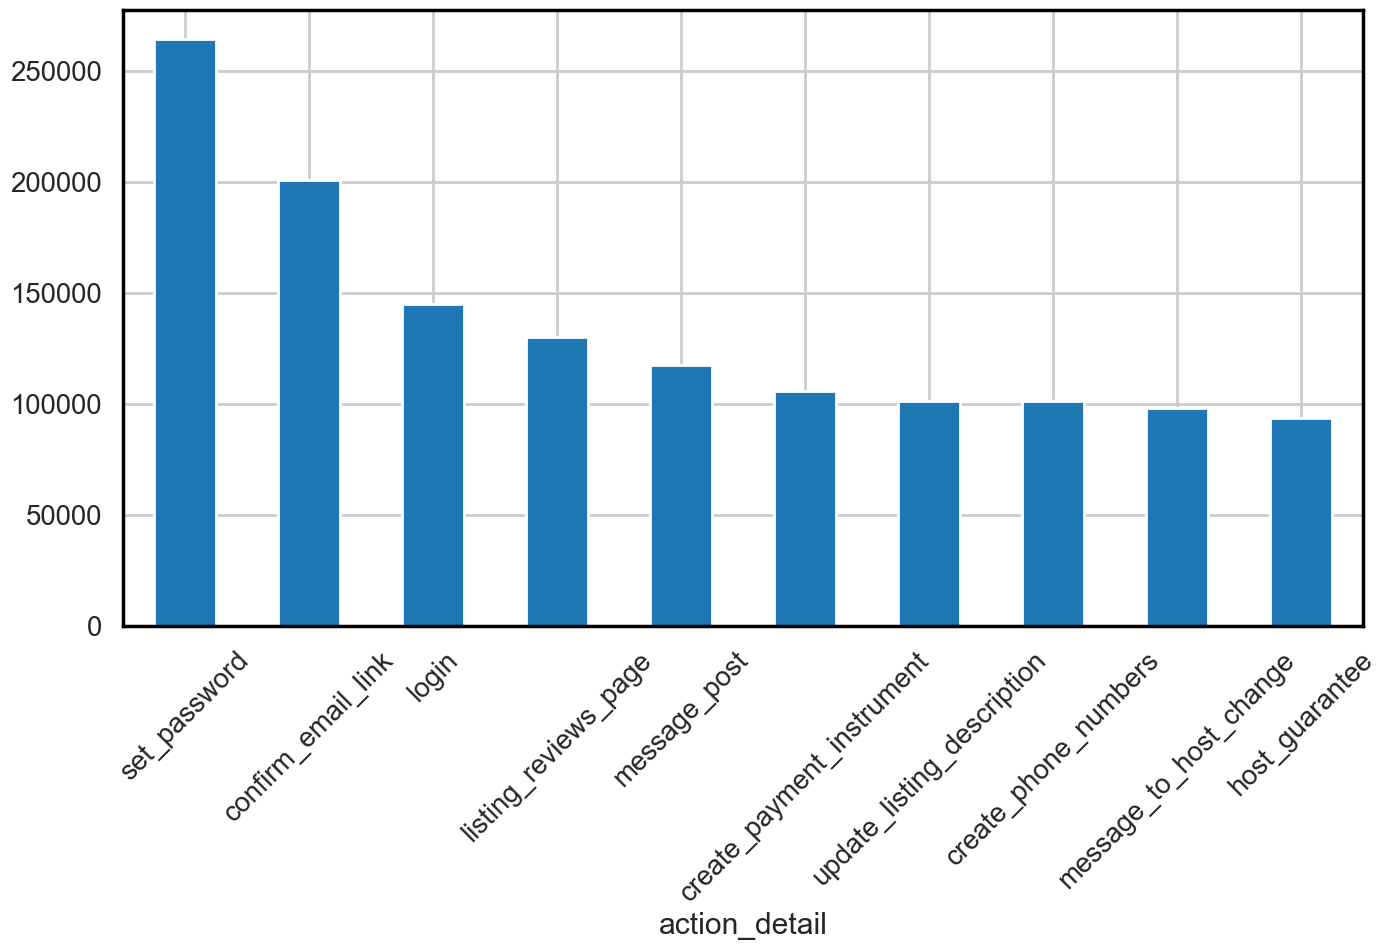

In [159]:
plt.figure(figsize=(16, 8))
a = sessions.groupby('action_detail')['secs_elapsed'].mean().sort_values(ascending=False)
a.head(10).plot(kind='bar', rot = 45)

## 예약을 진행한 회원과 예약을 하지 않은 회원의 평균 세션 시간 차이

In [166]:
train_users['booking'] = train_users['date_first_booking'].apply(lambda x: 0 if pd.isnull(x) else 1)

sessions_booking = sessions[sessions['user_id'].isin(train_users[train_users['booking']==1]['id'].tolist())].reset_index(drop=True)
sessions_X = sessions[sessions['user_id'].isin(train_users[train_users['booking']==0]['id'].tolist())].reset_index(drop=True)

In [170]:
sessions_booking.groupby('user_id')['secs_elapsed'].mean().mean()
# 예약을 진행한 회원의 평균 세션 시간 : 36044초 (약 10시간)

36044.06055889174

In [169]:
sessions_X['secs_elapsed'].mean()
# 예약을 진행하지 않은 회원의 평균 세션 시간 : 19190초 (약 5시간)

19190.145581542478

# Holidays make people hate travel
## : 휴일은 사람들이 여행을 싫어하게 만든다
https://www.kaggle.com/code/scottbrenstuhl/holidays-make-people-hate-travel

미국의 대표적인 휴일은 크리스마스와 추수감사절이다. 
이러한 휴일에 예약이 어떻게 진행되었는지 확인해보자. 

In [203]:
# 주간 정보 추가: 요일을 고려하여 첫 예약 날짜의 주를 계산합니다.
train_users['week_booked'] = train_users['date_first_booking'] - pd.to_timedelta(train_users['date_first_booking'].dt.dayofweek, unit='d')

# 주간 예약 수 계산
weekly_booked = train_users.groupby('week_booked').size().reset_index(name='booking_count')

# 2014년 3월 23일 이전의 주간 예약 수만 선택
weekly_booked = weekly_booked[weekly_booked['week_booked'] < pd.to_datetime('2014-03-23')]

# 결측치가 있는 행 제거
weekly_booked = weekly_booked.dropna()

In [204]:
# 주에 따라서 몇 번 예약이 진행되었는지 나타냄(각 주의 첫 번째 날짜 의미)
weekly_booked

,week_booked,booking_count
0,2009-12-28,1
1,2010-01-04,6
2,2010-01-11,6
3,2010-01-18,7
4,2010-01-25,9
...,...,...
216,2014-02-17,883
217,2014-02-24,932
218,2014-03-03,926
219,2014-03-10,1009


/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_59837/1258754116.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  thanksgiving_weeks = weekly_booked[weekly_booked['week_booked'].isin(['2010-11-22', '2011-11-21', '2012-11-19', '2013-11-25'])]


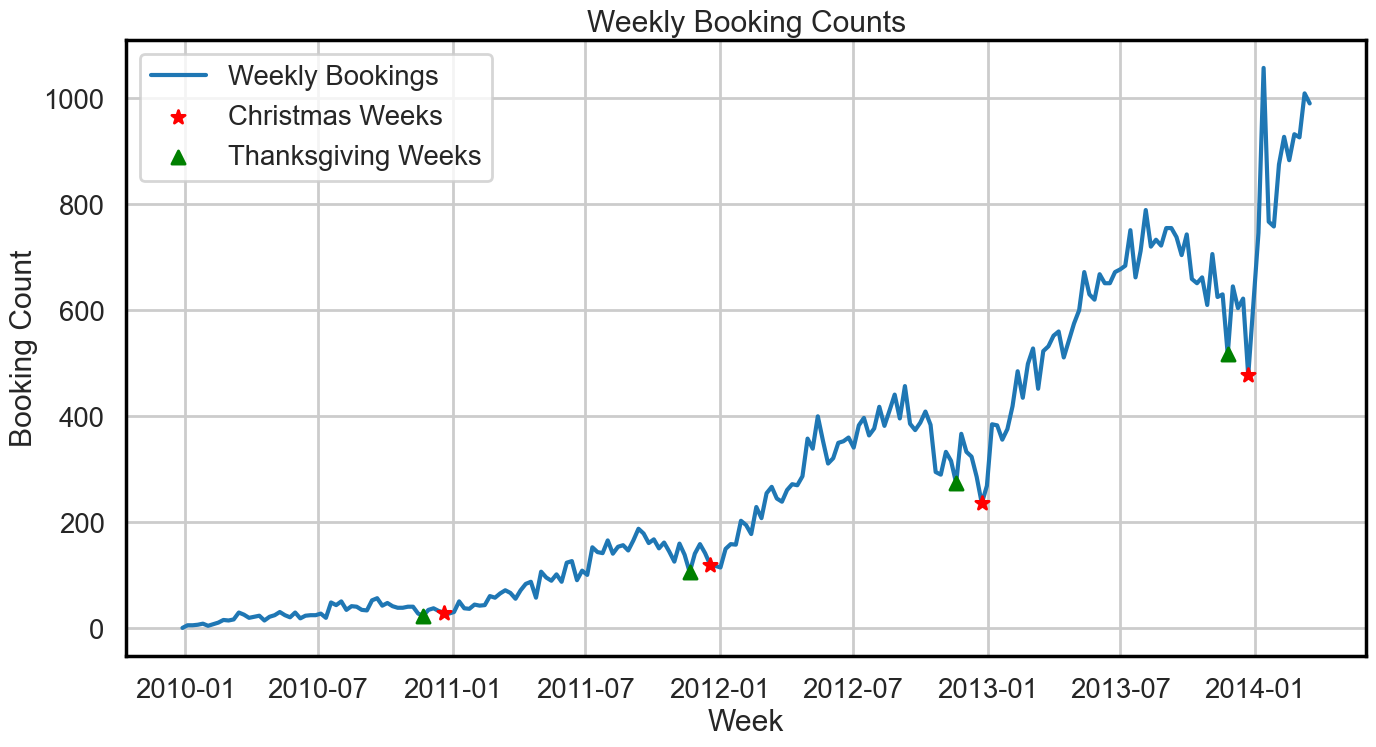

In [205]:
import matplotlib.pyplot as plt

# 추수감사절을 포함하는 주 찾기
thanksgiving_weeks = weekly_booked[weekly_booked['week_booked'].isin(['2010-11-22', '2011-11-21', '2012-11-19', '2013-11-25'])]

# 크리스마스를 포함하는 주 찾기
christmas_weeks = weekly_booked[weekly_booked['week_booked'].dt.month == 12]
christmas_weeks = christmas_weeks[(christmas_weeks['week_booked'].dt.day <= 25) & (christmas_weeks['week_booked'].dt.day >= 18)]

# 주간 예약 수 그래프 그리기
plt.figure(figsize=(16, 8))
plt.plot(weekly_booked['week_booked'], weekly_booked['booking_count'], label='Weekly Bookings', zorder=2)
plt.scatter(christmas_weeks['week_booked'], christmas_weeks['booking_count'], color='red', marker='*', s=100, label='Christmas Weeks', zorder=3)
plt.scatter(thanksgiving_weeks['week_booked'], thanksgiving_weeks['booking_count'], color='green', marker='^', s=90, label='Thanksgiving Weeks', zorder=3)
plt.title('Weekly Booking Counts')
plt.xlabel('Week')
plt.ylabel('Booking Count')
plt.legend()
plt.show()


사용자의 예약은 매년 추수감사절과 크리스마스 주에 떨어지는 경향을 보이고 있다. <br>
이는 사람들이 친구와 가족들을 만나느라 여행을 계획하지 않았음을 알 수 있다. </br>
다른 사람들을 많이 만나는 이러한 시기에 가족 휴가 등을 마케팅해보면, 더 큰 이득으로 진행될 수도 있을듯하다. 

In [200]:
# 크리스마스를 포함하는 주 찾기
christmas_weeks = weekly_booked[weekly_booked['week_booked'].dt.month == 12]
christmas_weeks = christmas_weeks[(christmas_weeks['week_booked'].dt.day <= 25) & (christmas_weeks['week_booked'].dt.day >= 18)]
christmas_weeks

,week_booked,booking_count
51,2010-12-20,30
103,2011-12-19,120
156,2012-12-24,236
208,2013-12-23,477


In [201]:
# 추수감사절 : ['2010-11-21', '2011-11-20', '2012-11-18', '2013-11-24']
thanksgiving_weeks = weekly_booked[weekly_booked['week_booked'].isin(['2010-11-22', '2011-11-21', '2012-11-19', '2013-11-25'])]
thanksgiving_weeks

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_59837/2337917187.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  thanksgiving_weeks = weekly_booked[weekly_booked['week_booked'].isin(['2010-11-22', '2011-11-21', '2012-11-19', '2013-11-25'])]


,week_booked,booking_count
47,2010-11-22,24
99,2011-11-21,106
151,2012-11-19,274
204,2013-11-25,517
